# Data Sonification

<img src="img/cover.png">


In [3]:
!pip --quiet install -r requirements.txt

In [4]:
# Import all required libraries for data sonification
# https://astronify.readthedocs.io/en/latest/index.html
from astronify.series import SoniSeries
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



/Users/ofir.n/Projects/data_sonification/.venv/lib/python3.11/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


/var/folders/4p/3v7c85y55qdc7jt3wv838n700000gp/T/ipykernel_44739/656944780.py:5: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  "KIC 11804465", cadence="long", quarter=1).download_all()[0].SAP_FLUX.to_table()


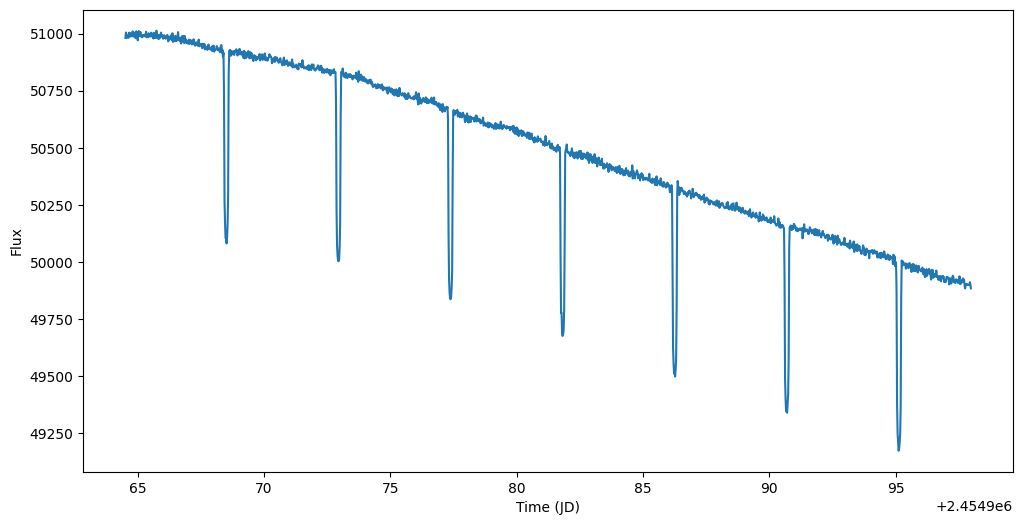

In [5]:
# Download a Kepler light curve for Kepler-12b using lightkurve
# This is a light curve that shows Kepler 12b, a transiting exoplanet

kep12b_lc = search_lightcurve(
    "KIC 11804465", cadence="long", quarter=1).download_all()[0].SAP_FLUX.to_table()
f, ax = plt.subplots(figsize=(12, 6))
ax.plot(kep12b_lc['time'].jd, kep12b_lc['flux'])
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Flux")
plt.show()

### ⚠️ Trigger Alert: This is NOT an alarm! <img src="img/pikud.png">

In [6]:
kep12b_obj = SoniSeries(kep12b_lc)
kep12b_obj.sonify()
kep12b_obj.play()

/Users/ofir.n/Projects/data_sonification/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [10]:
# The playback will stop at the end, but we can also stop it early.
kep12b_obj.stop()

In [8]:
print(kep12b_obj.pitch_mapper.pitch_map_args)

{'pitch_range': [100, 10000], 'center_pitch': 440, 'zero_point': 'median', 'stretch': 'linear'}


In [9]:
kep12b_obj.pitch_mapper.pitch_map_args["center_pitch"] = 880

kep12b_obj.sonify()
kep12b_obj.play()

/Users/ofir.n/Projects/data_sonification/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [11]:
# kep12b_obj.stop()
# Once the sonification sounds the way we like we can output the result to a wav file.
# kep12b_obj.write("kepler_12b.wav")

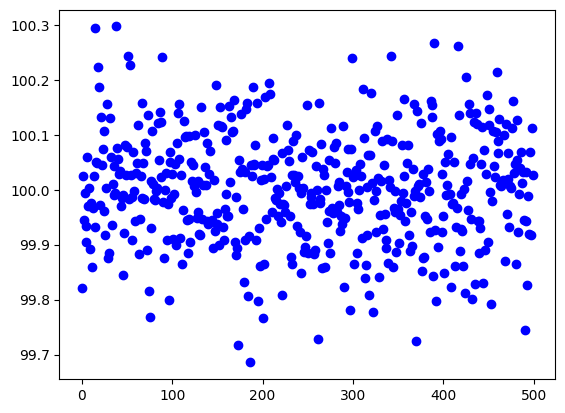

In [12]:
from astropy.io import fits
from astropy.table import Table
from astronify import simulator, series

lc_data = simulator.simulated_lc(
    "flat", lc_length=500, lc_noise=0.1, visualize=True, lc_yoffset=100.)
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()

In [13]:
soni_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


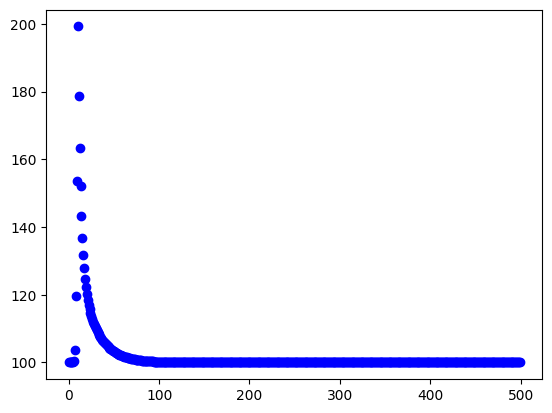

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [14]:
lc_data = simulator.simulated_lc("flare", visualize=True)
soni_obj = series.SoniSeries(lc_data)
soni_obj.sonify()
soni_obj.play()

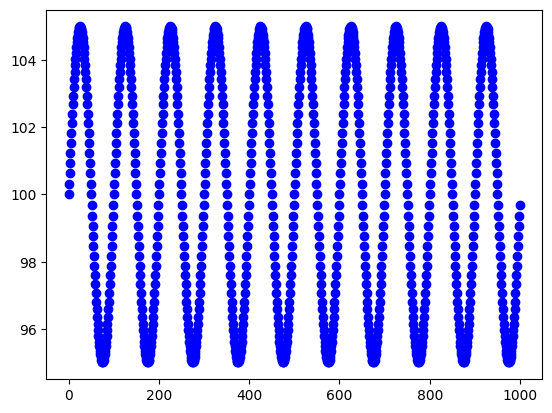

In [15]:
# Now let’s make a sinusoidal signal and use some of the parameter options.
# We will change the amplitude (how “big” the curve is from top to bottom),
# and the period (how long it takes to make one full cycle from peak to bottom and back to peak again).
# We’ll also add a little noise to the light curve, and ask for a light curve that lasts twice as long as the default.

lc_data = simulator.simulated_lc(
    "sine", visualize=True, sine_amp=5, sine_period=100, lc_noise=0, lc_length=1000)
soni_obj = series.SoniSeries(lc_data)

In [16]:
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


## Extras:
* [Covid-19](https://soundcloud.com/user-275864738/viral-counterpoint-of-the-coronavirus-spike-protein-2019-ncov)
* [Total Solar Eclipse Sonification w/Kronos Quartet | Exploratorium](https://www.youtube.com/watch?v=dqJMMQQ5QI8&ab_channel=Exploratorium)
* [The Legend of Nixon - Presidential Approval Ratings as Video Game Soundscape](https://twotone.io/examples/legend-of-nixon/)
* [Uh oh](https://www.youtube.com/shorts/0odFoaTR5yU)

In [17]:
# There are many insights that can be gained from sonification
# https://www.youtube.com/watch?v=bfWD1voJS_w&ab_channel=LightIT